In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("diminos_data.csv")
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [64]:
df.duplicated().sum()

np.int64(0)

In [51]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower()

In [52]:
# Convert to datetime
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"], errors="coerce")
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"], errors="coerce")

In [53]:
# Create delivery time in minutes
df["delivery_minutes"] = (
    df["order_delivered_at"] - df["order_placed_at"]
).dt.total_seconds()/60

In [54]:
df["delivery_minutes"].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_minutes, dtype: float64

In [55]:
p95 = df["delivery_minutes"].quantile(0.95)
p95

np.float64(27.261043996666658)

In [56]:
late_percentage = (df["delivery_minutes"] > 31).mean() * 100
late_percentage

np.float64(3.713333333333333)

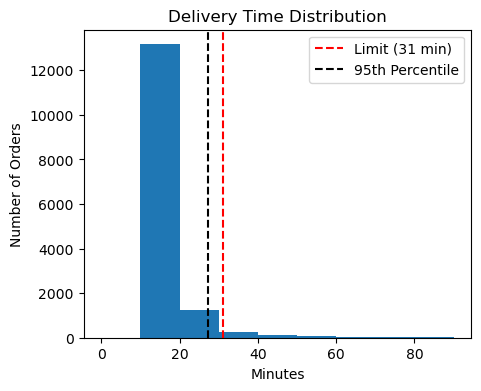

In [57]:
import matplotlib.pyplot as plt
custom_bins=[0,10,20,30,40,50,60,70,80,90]
plt.figure(figsize=(5,4))
plt.hist(df["delivery_minutes"], bins=custom_bins)
plt.axvline(31, color="red", linestyle="--", label="Limit (31 min)")
plt.axvline(p95, color="black", linestyle="--", label="95th Percentile")
plt.legend()
plt.title("Delivery Time Distribution")
plt.xlabel("Minutes")
plt.ylabel("Number of Orders")
plt.show()

In [58]:
worst_5_percent = df[df["delivery_minutes"] >= p95]
worst_5_percent["delivery_minutes"].describe()

count     750.000000
mean       95.534925
std       423.263607
min        27.274700
25%        30.899055
50%        37.482705
75%        56.997738
max      7299.831375
Name: delivery_minutes, dtype: float64

In [59]:
df["delivery_minutes"].describe(percentiles=[0.5, 0.9, 0.95, 0.99])

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
50%         15.797986
90%         21.156905
95%         27.261044
99%         65.064186
max       7299.831375
Name: delivery_minutes, dtype: float64

In [61]:
(df['delivery_minutes']>31).sum()

np.int64(557)

In [62]:
(df['delivery_minutes']<31).sum()

np.int64(14443)

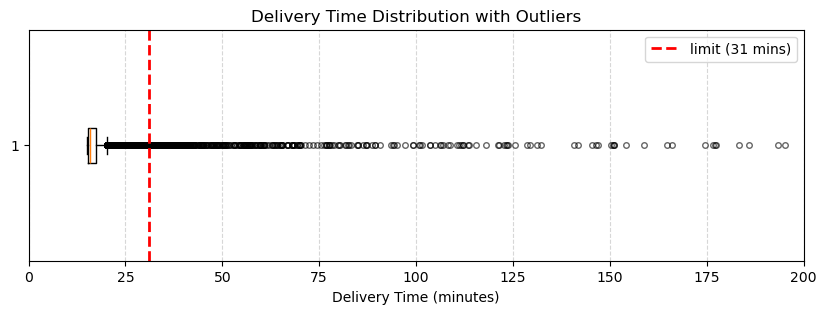

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

plt.boxplot(
    df["delivery_minutes"],
    vert=False,
    showfliers=True,
    flierprops=dict(
        marker='o',
        markersize=4,
        alpha=0.6
    )
)
plt.axvline(31, color="red", linestyle="--", linewidth=2, label="limit (31 mins)")
plt.xlim(0, 200)  
plt.xlabel("Delivery Time (minutes)")
plt.title("Delivery Time Distribution with Outliers")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

In [ ]:
# The Store requires 95% of deliveries to be under 31 minutes.
# Analysis shows a significant number of deliveries exceed 31 minutes.
# Even if most orders are on time, long-tail delays push the 95th percentile above the limit, risking franchise.
#Control deliveries just above 31 mins.
#Eliminate extreme delays.
#Monitor P95 daily, not just average delivery time